In [7]:
# DATA_PATH = '/content/drive/MyDrive/Kuliah/Semester 4/ML/ObesityDataSet.csv'
DATA_PATH = 'G:/My Drive/Kuliah/Semester 4/ML/ObesityDataSet.csv'

In [8]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

# Install Library

In [9]:
# Data Manipulation and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


# Model Selection and Training
from sklearn.model_selection import GridSearchCV, train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score
)

# Model Persistence
import joblib

# Load Data

In [10]:
df = pd.read_csv(DATA_PATH)

# EDA

## Data Understanding

In [11]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
df.shape

(2111, 17)

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

print("Categorical Columns:")
for column in categorical_columns:
    print(f" - {column}")

print("\nNumerical Columns:")
for column in numerical_columns:
    print(f" - {column}")

Categorical Columns:
 - Gender
 - family_history_with_overweight
 - FAVC
 - CAEC
 - SMOKE
 - SCC
 - CALC
 - MTRANS
 - NObeyesdad

Numerical Columns:
 - Age
 - Height
 - Weight
 - FCVC
 - NCP
 - CH2O
 - FAF
 - TUE


In [99]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Check Duplicate Data

In [100]:
duplicates = df[df.duplicated()]

print(f"Total Data Before Remove Duplicate: {df.shape[0]}\n")
print(f"Number of duplicate rows: {duplicates.shape[0]}\n")
if duplicates.shape[0] > 0:
    print("Example of Duplicate rows:")
    print(duplicates)

Total Data Before Remove Duplicate: 2111

Number of duplicate rows: 24

Example of Duplicate rows:
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.

## Check Missiing Or Null Values

In [101]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Outliers Detection

Number of outliers in Age: 168
Number of outliers in Height: 1
Number of outliers in Weight: 1
Number of outliers in FCVC: 0
Number of outliers in NCP: 579
Number of outliers in CH2O: 0
Number of outliers in FAF: 0
Number of outliers in TUE: 0


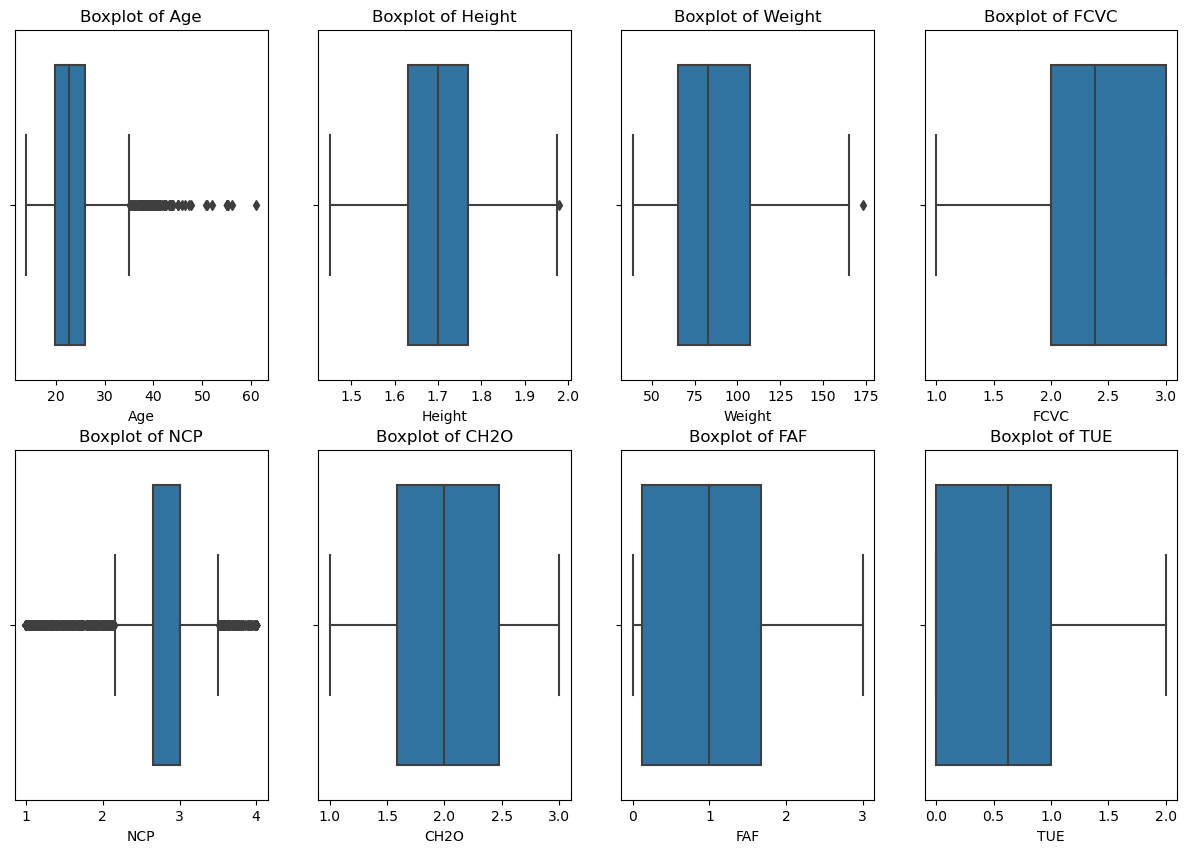

In [102]:
def detect_and_plot_outliers(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    num_columns = 4
    num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

    for i, column in enumerate(numerical_columns):
        row = i // num_columns
        col = i % num_columns

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Number of outliers in {column}: {outliers.shape[0]}")

        sns.boxplot(x=df[column], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {column}')

detect_and_plot_outliers(df)

## Univariate Analysis

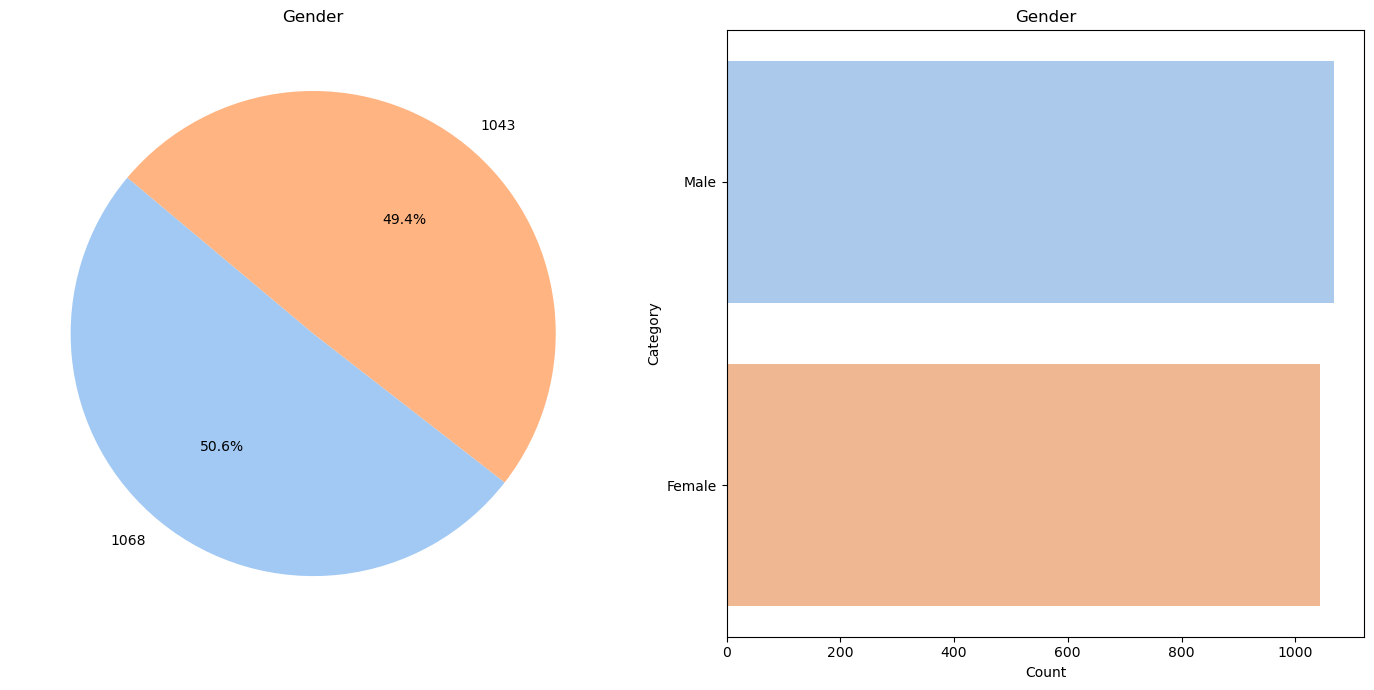

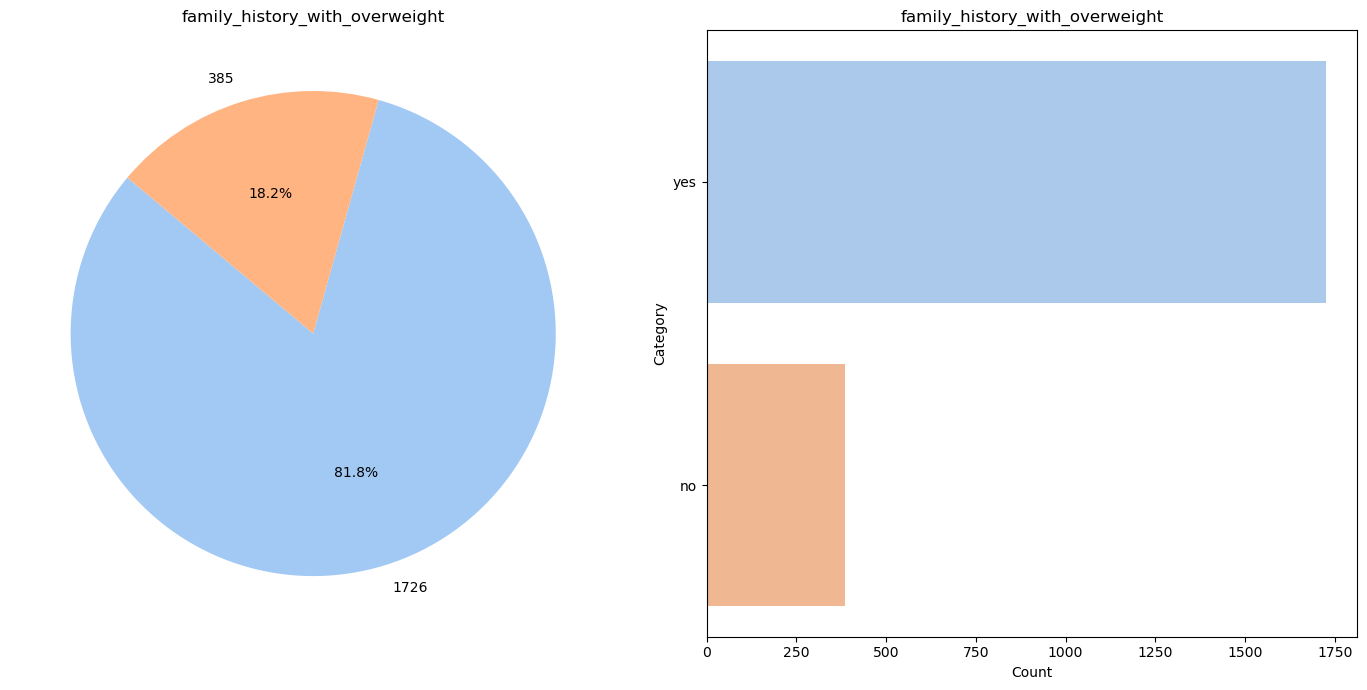

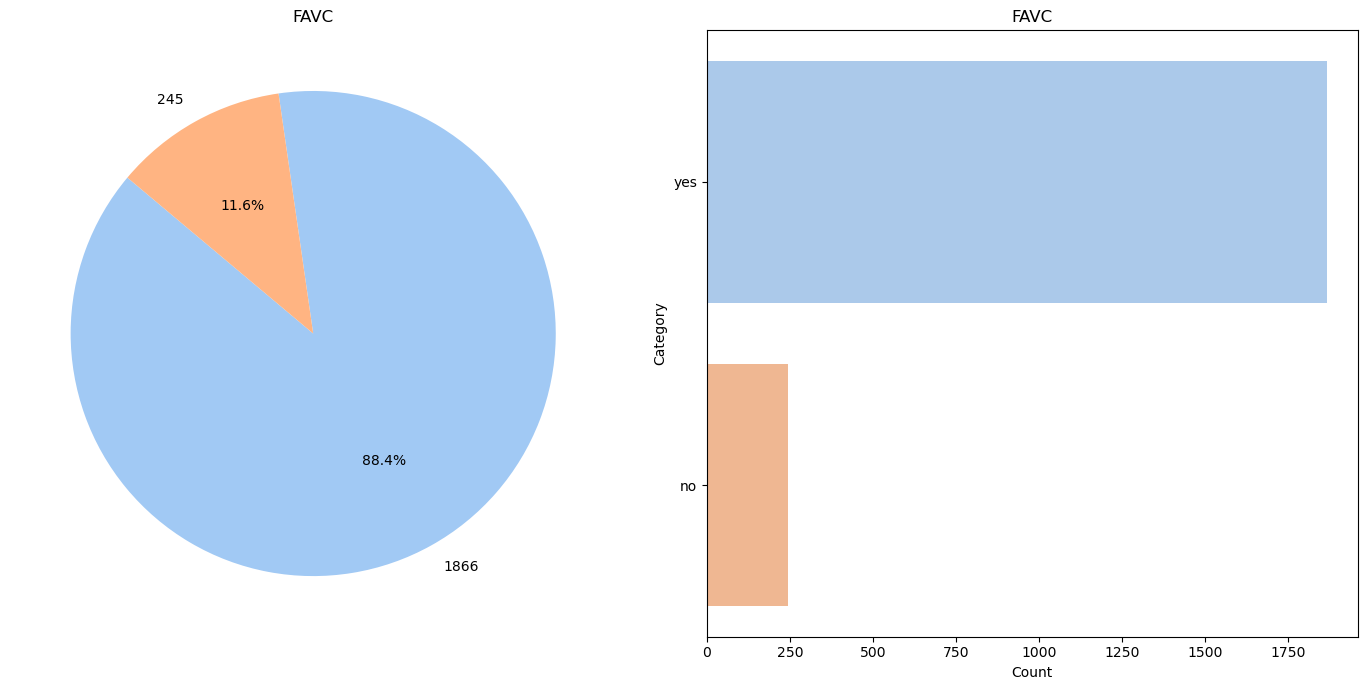

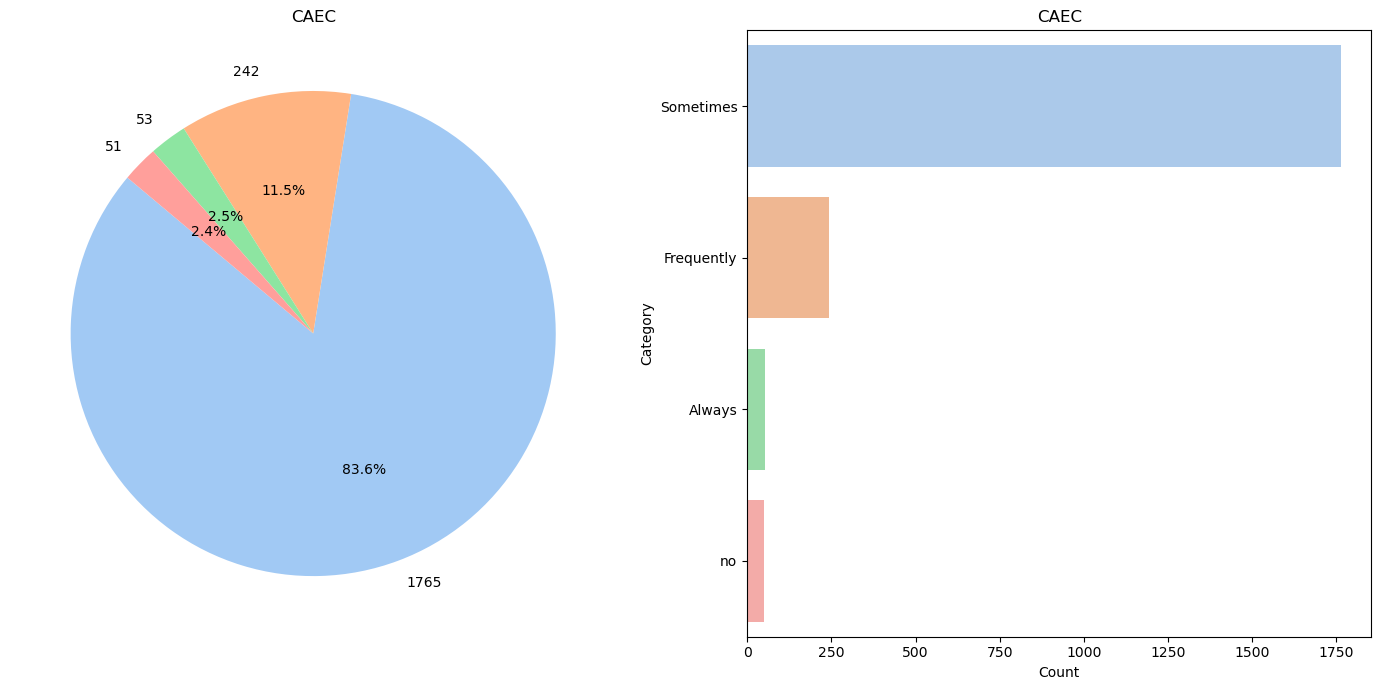

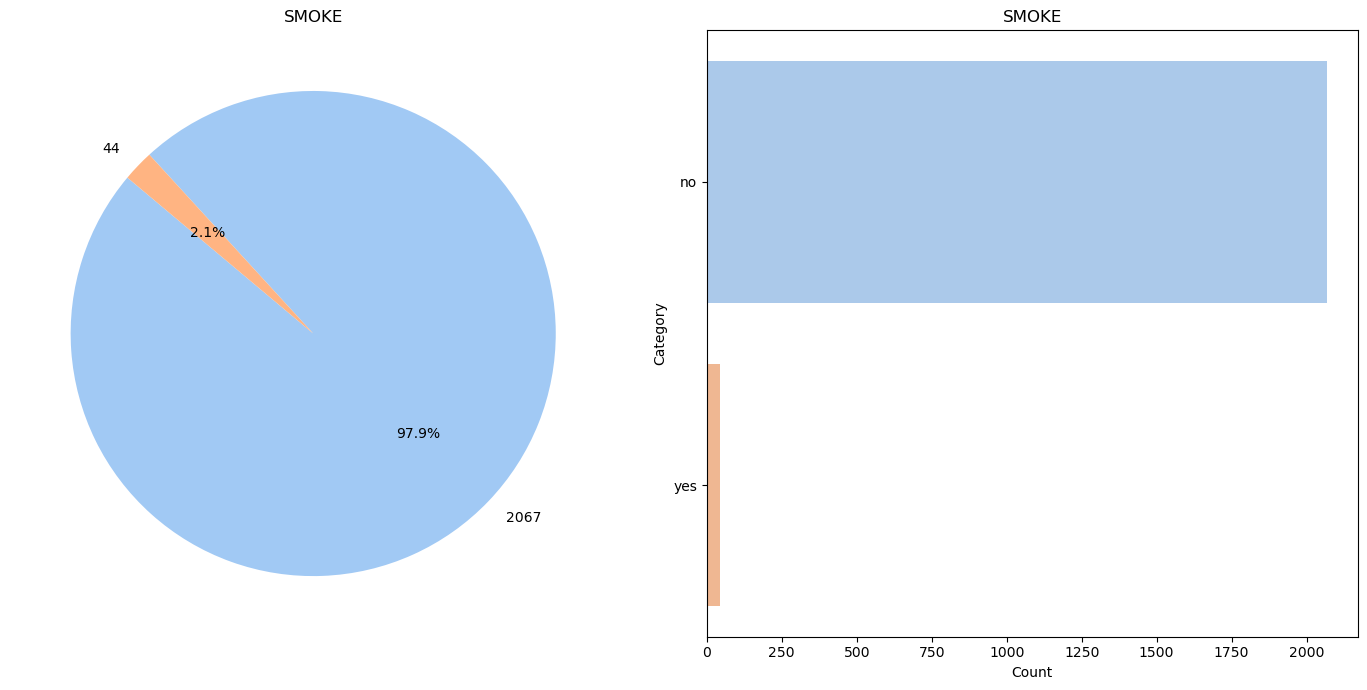

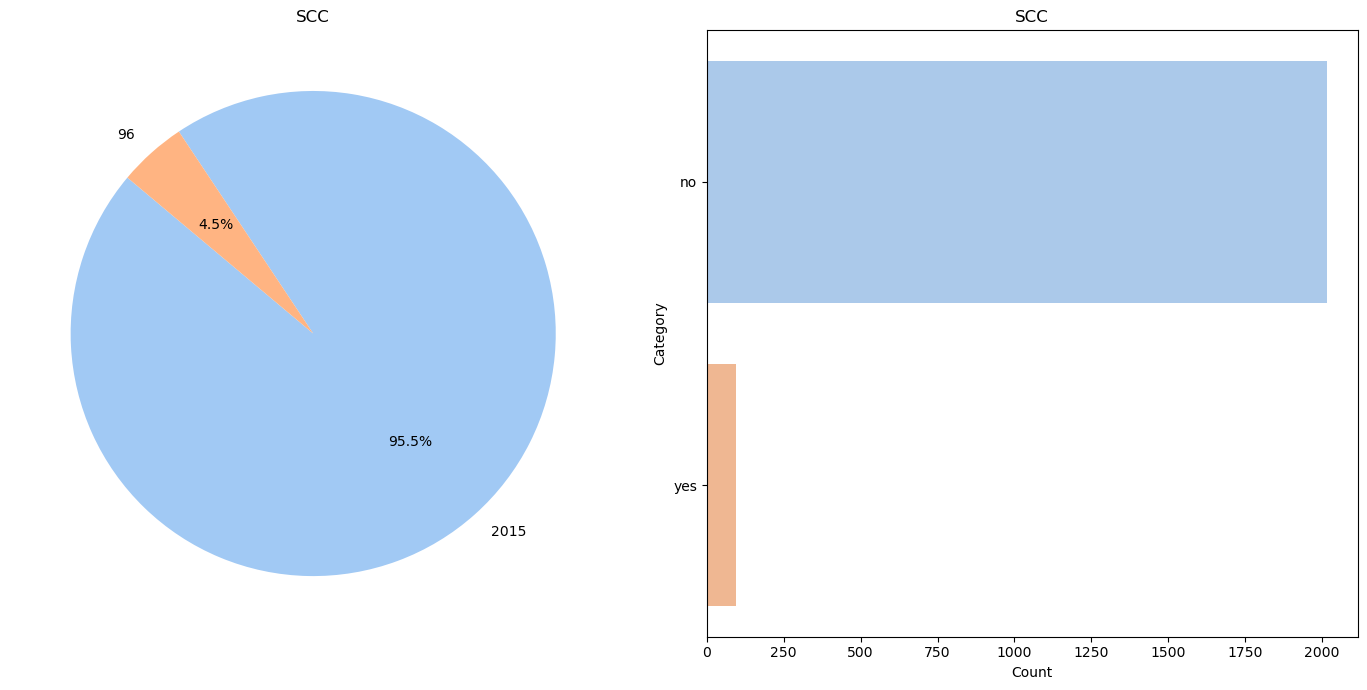

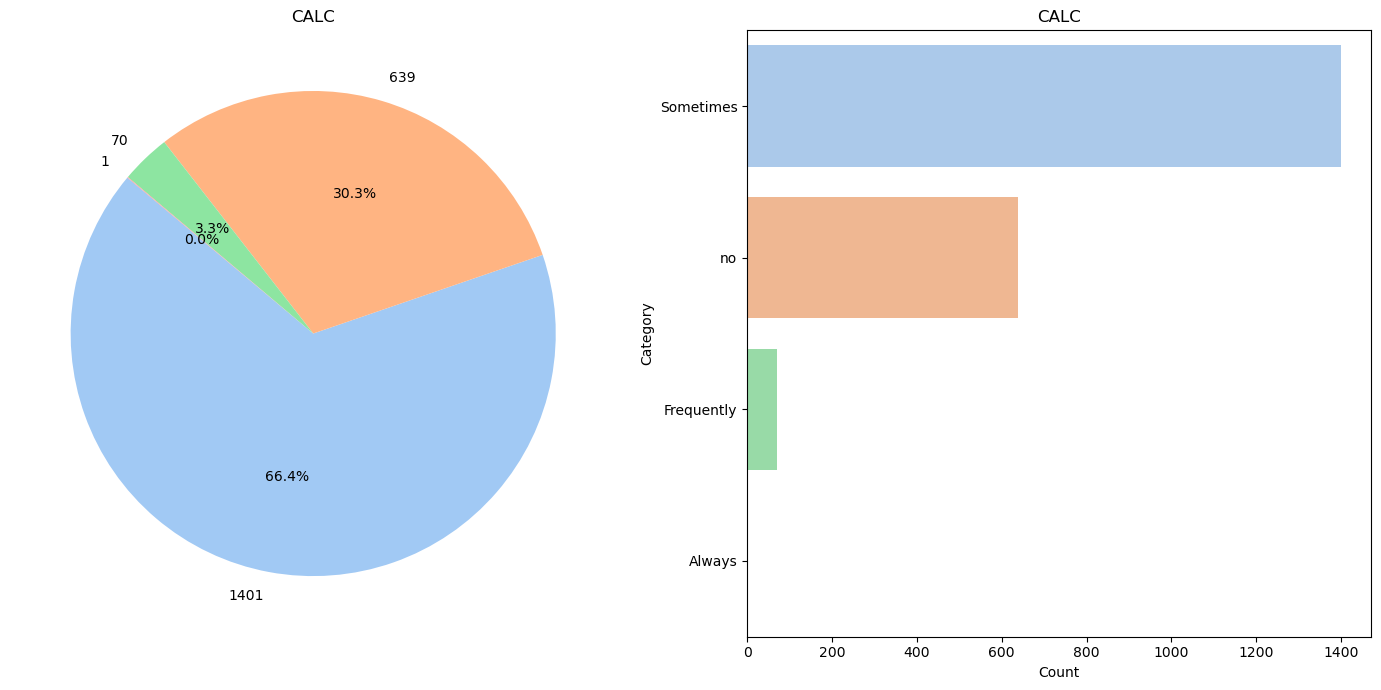

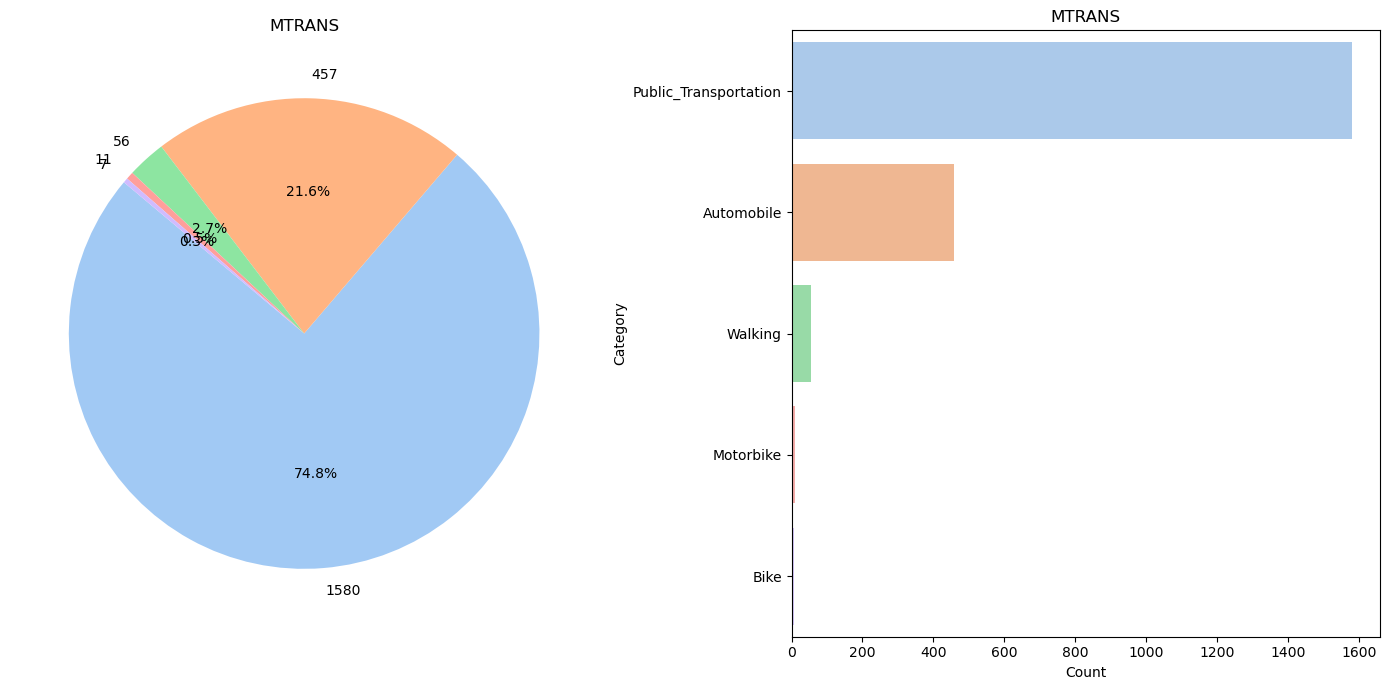

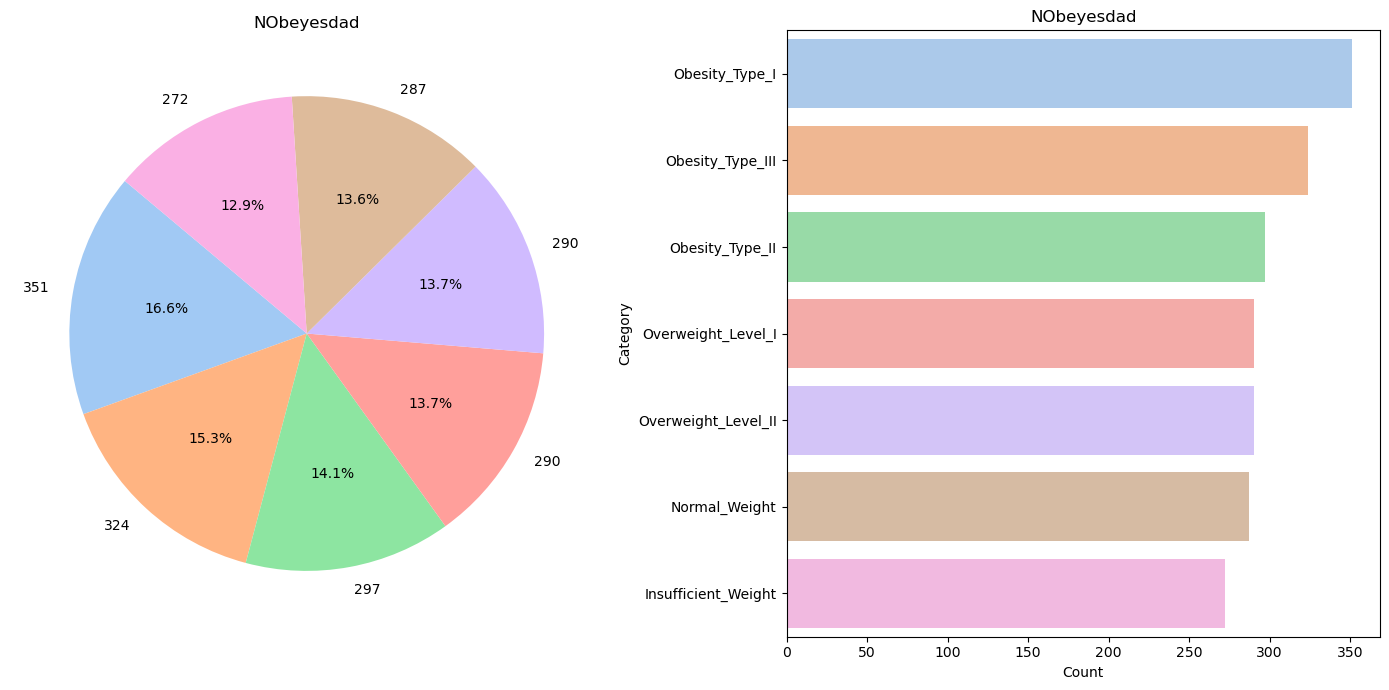

In [103]:
def univariate_analysis_categorical(df, column, title):
    data = df[column].value_counts().reset_index()
    data.columns = ['Category', 'Count']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    colors = sns.color_palette("pastel", len(data))
    ax1.pie(data['Count'], labels=data['Count'], colors=colors, autopct='%1.1f%%', startangle=140)
    ax1.set_title(title)

    sns.barplot(x='Count', y='Category', data=data, palette=colors, ax=ax2)
    ax2.set_title(title)

    plt.tight_layout()
    plt.show()

for column in categorical_columns:
    univariate_analysis_categorical(df, column, column)

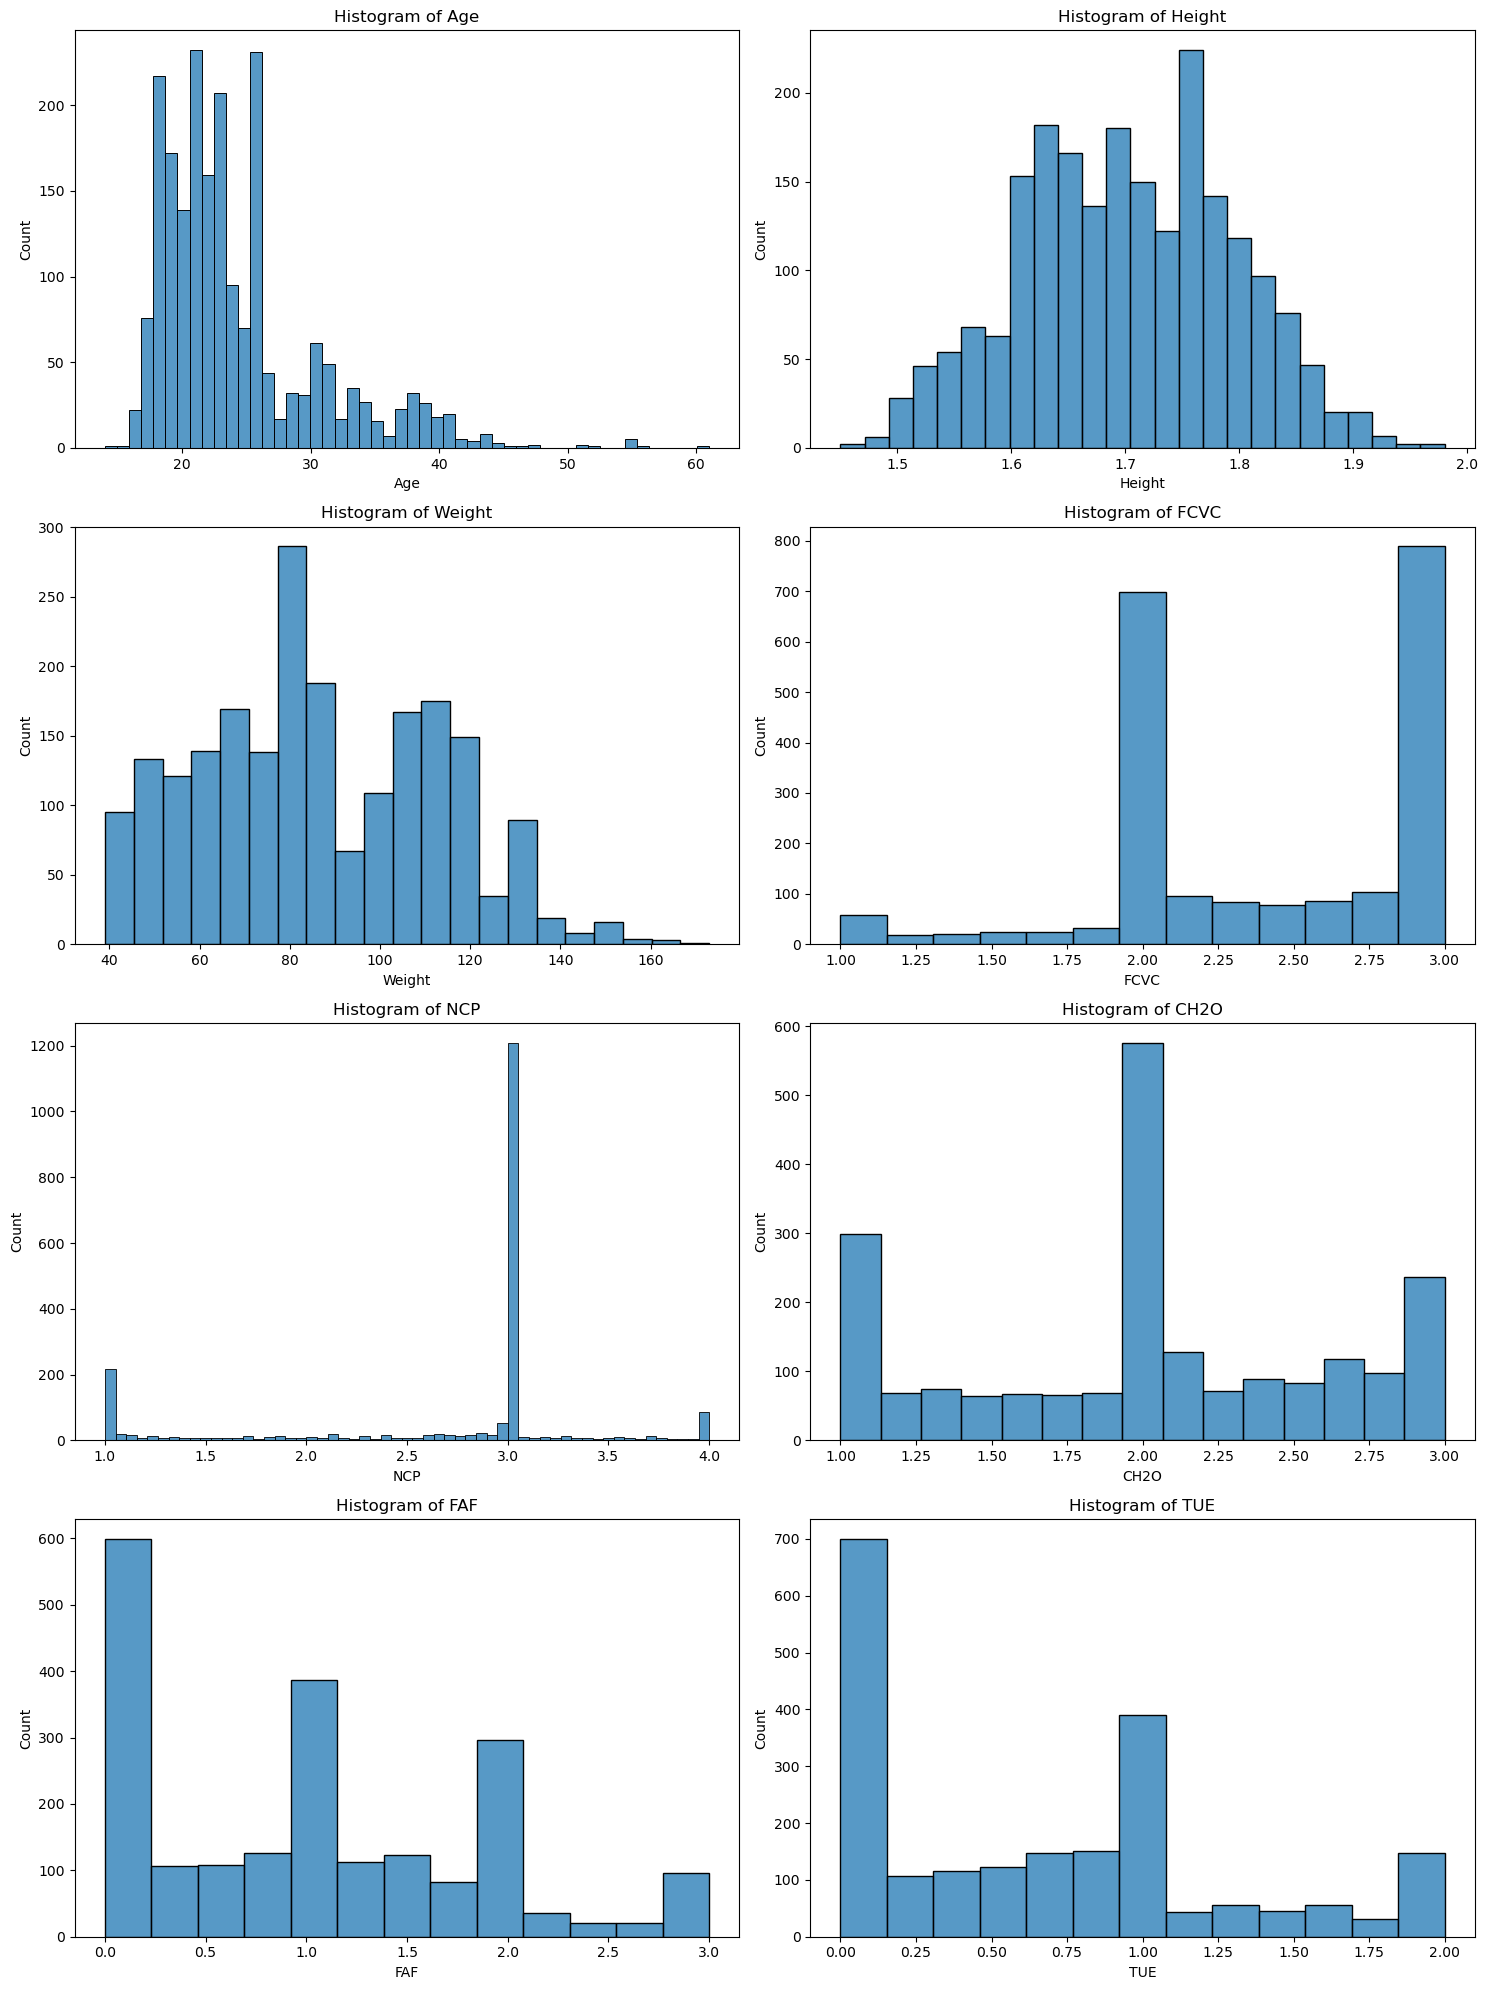

In [104]:
def univariate_analysis_numerical(df, columns):
    num_columns = 2
    num_rows = (len(columns) + num_columns - 1) // num_columns

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(df[column], kde=False, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

univariate_analysis_numerical(df, numerical_columns)

## Bivariate Analysis

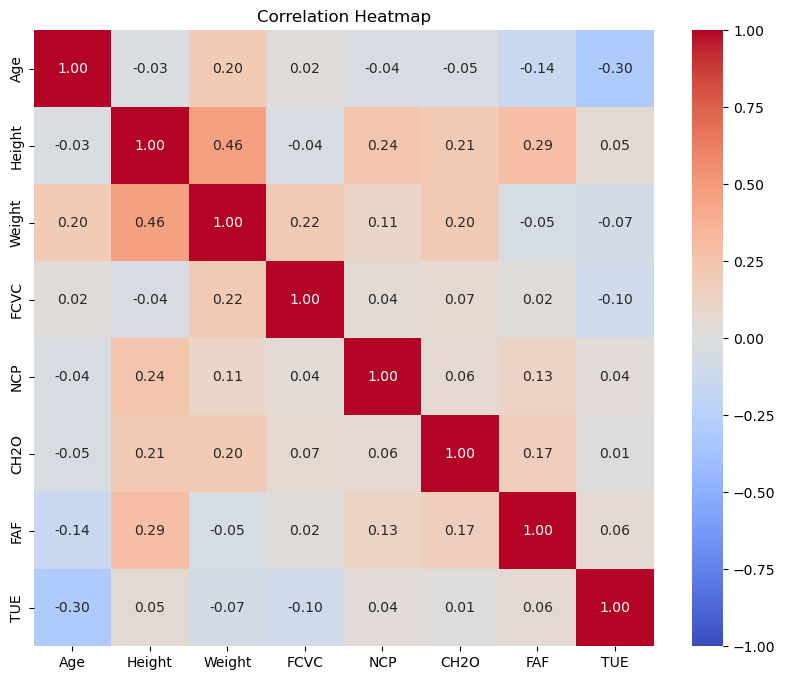

In [105]:
def bivariate_analysis(df, columns):
    corr_matrix = df[columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

bivariate_analysis(df, numerical_columns)

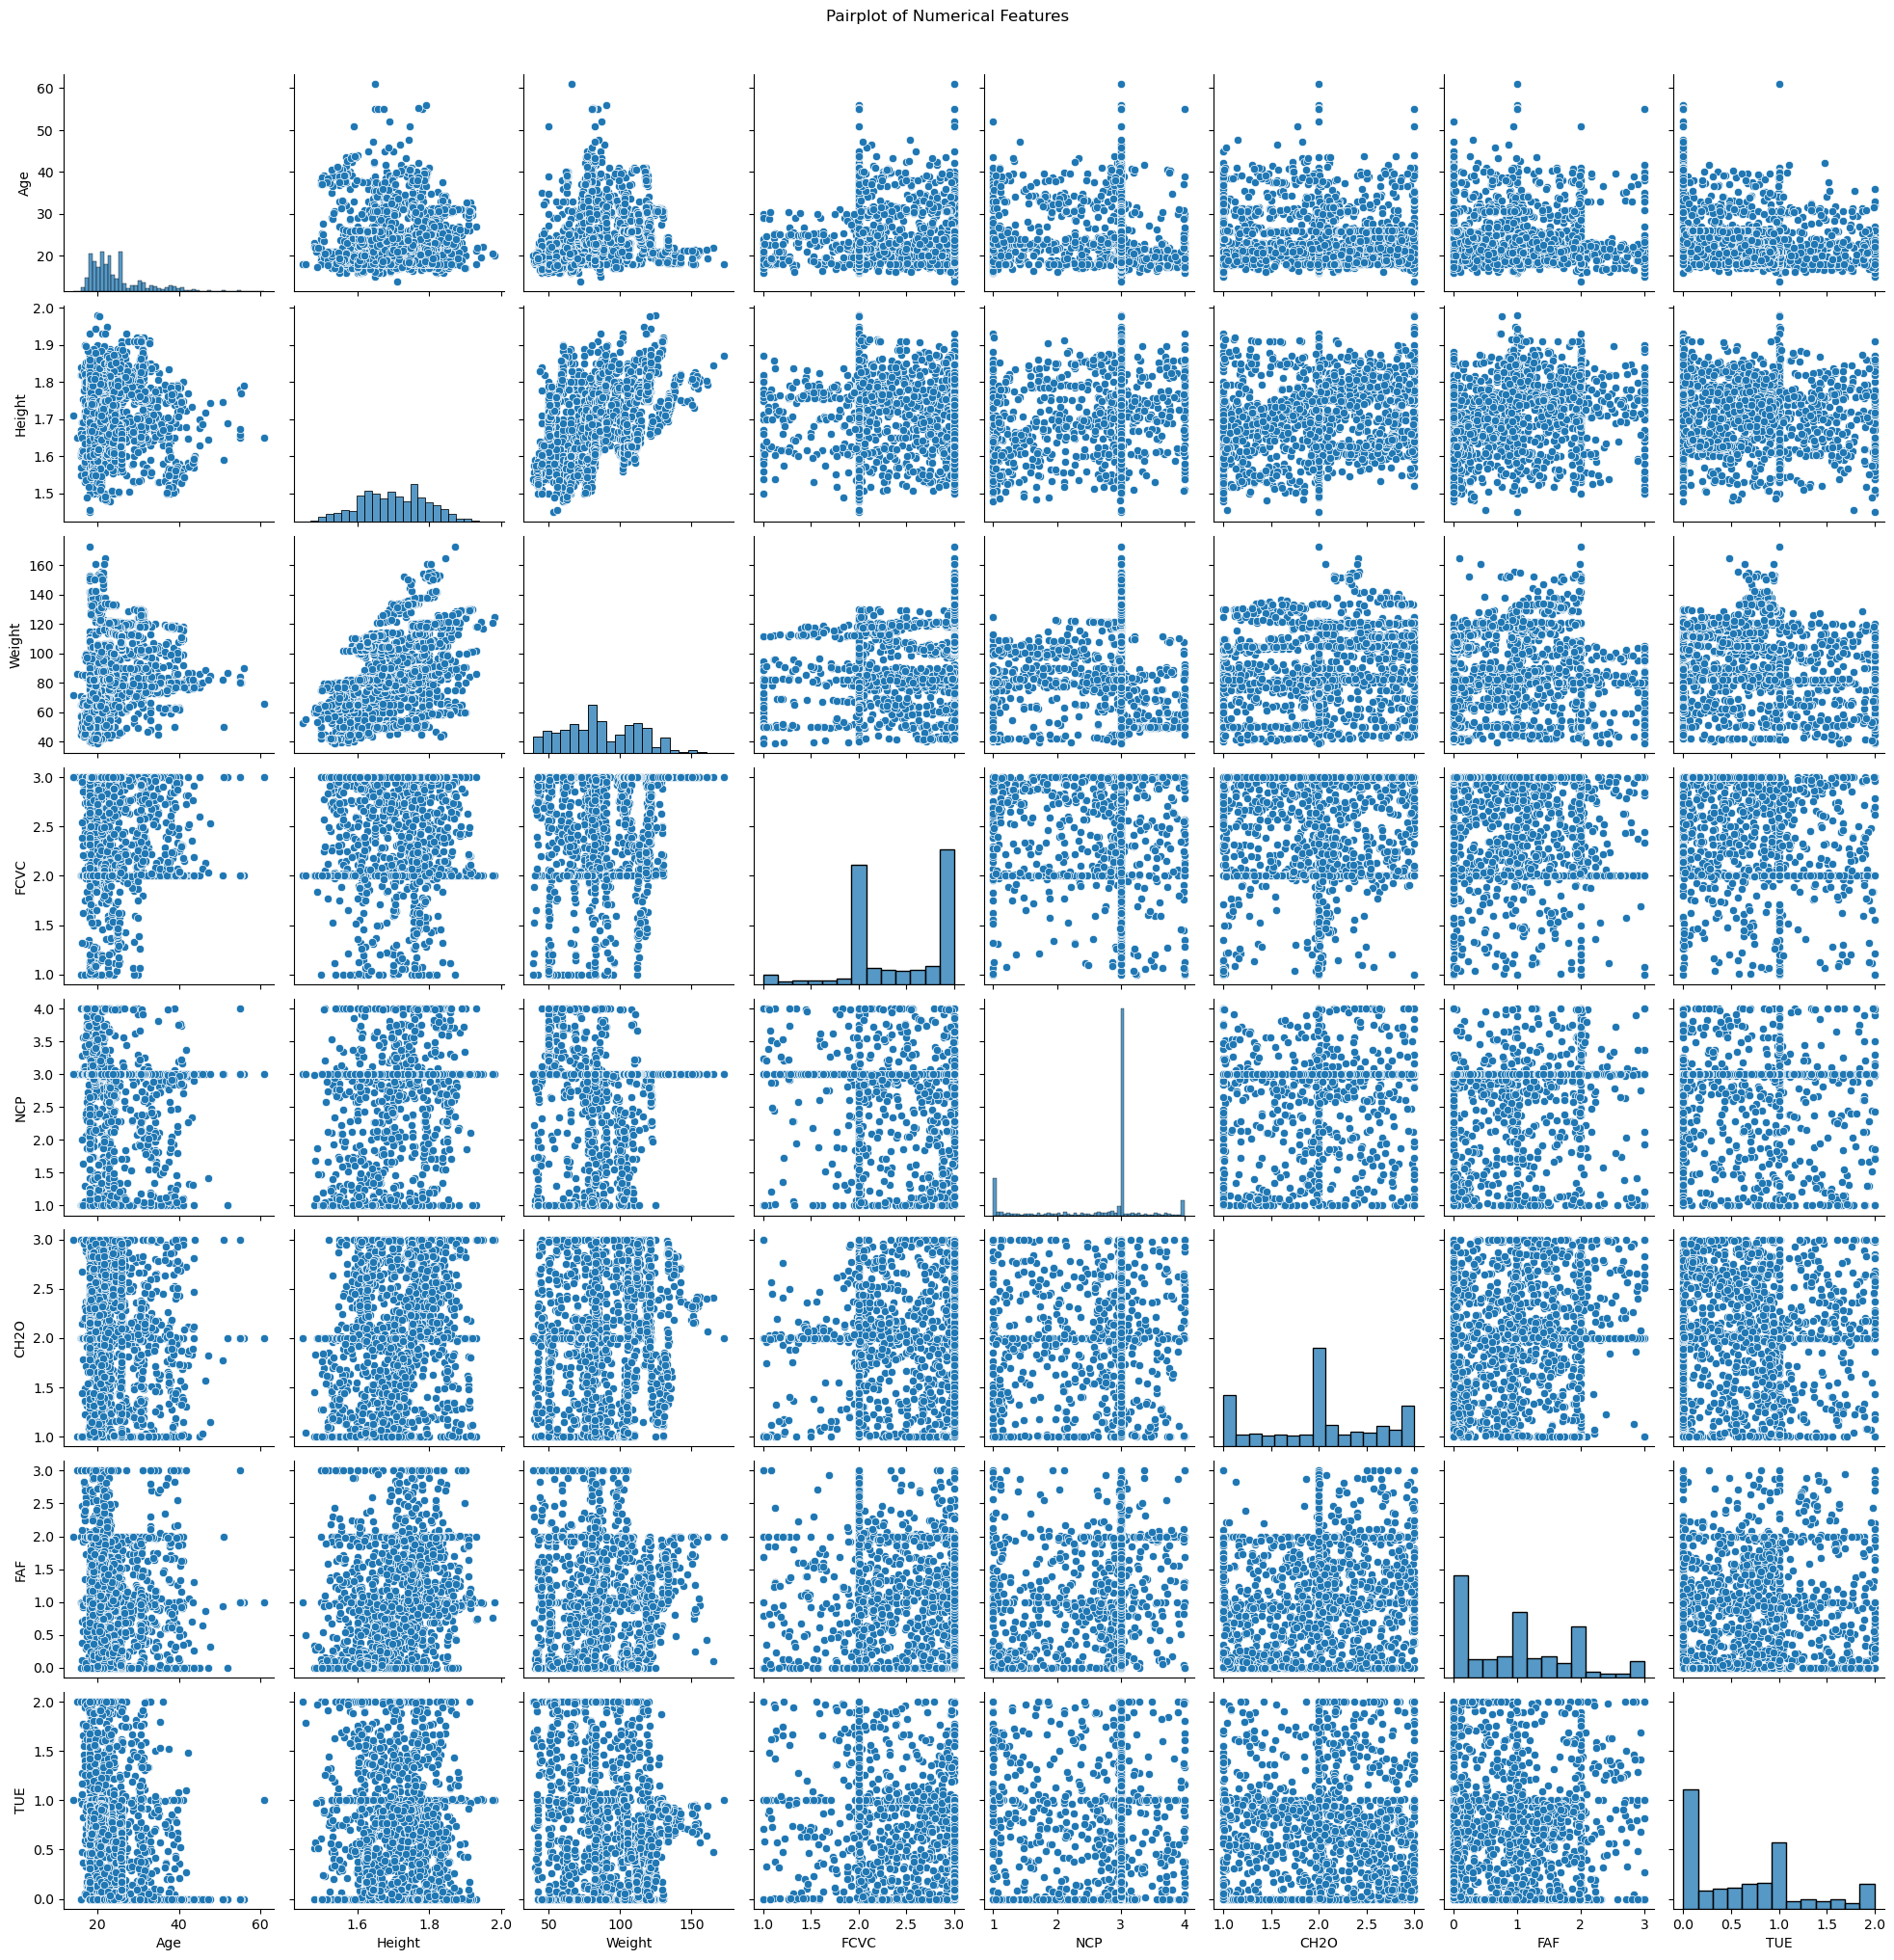

In [106]:
def create_pairplot(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()

create_pairplot(df, numerical_columns)

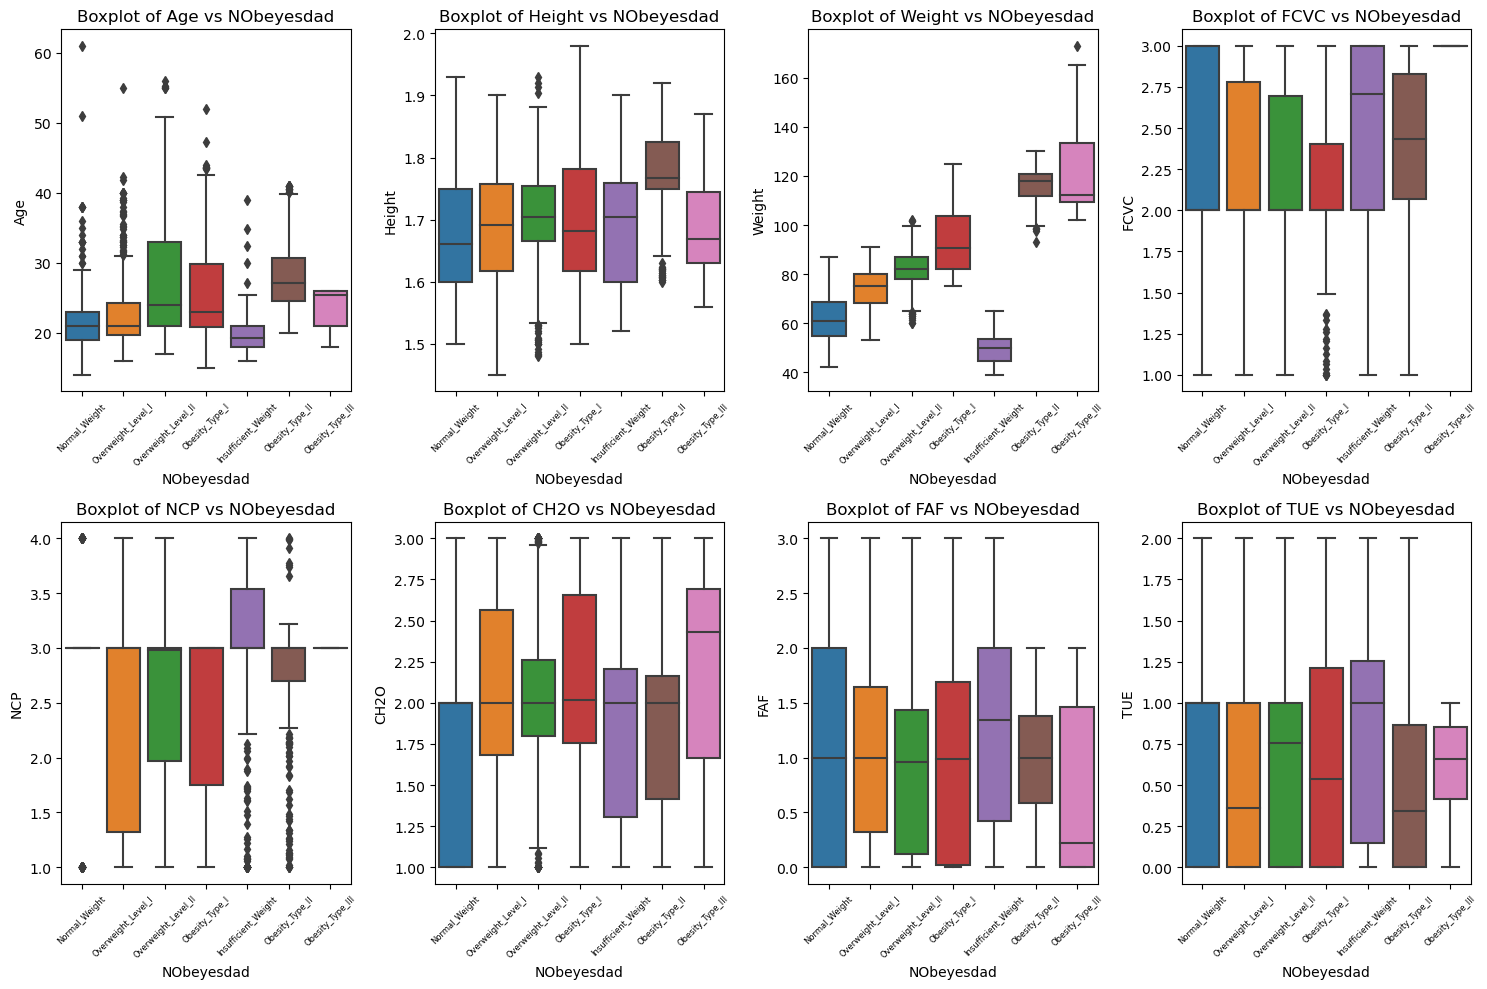

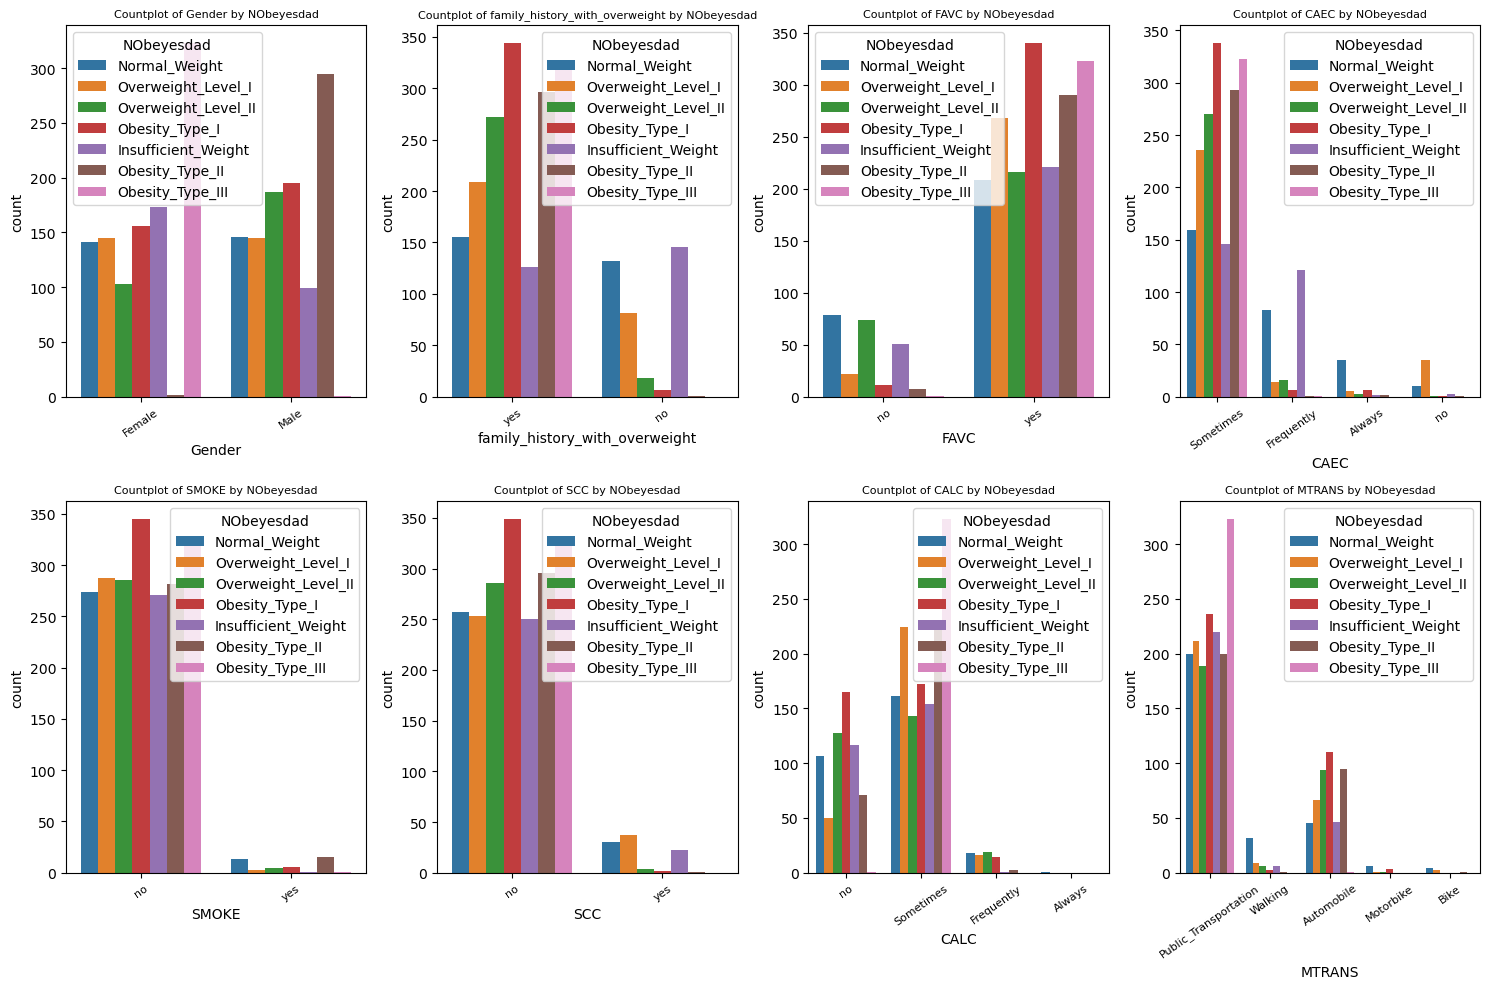

In [107]:
def plot_numerical_features(df, numerical_columns, target_variable):
    num_plots = len(numerical_columns)
    cols = 4
    rows = (num_plots + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=target_variable, y=column, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column} vs {target_variable}')
        axes[i].tick_params(axis='x', rotation=45, labelsize=6)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_categorical_features(df, categorical_columns, target_variable):
    num_plots = len(categorical_columns) - 1
    cols = 4
    rows = (num_plots + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        if column != target_variable:
            sns.countplot(x=column, hue=target_variable, data=df, ax=axes[i])
            axes[i].set_title(f'Countplot of {column} by {target_variable}', fontsize=8)
            axes[i].tick_params(axis='x', rotation=35, labelsize=8)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df, numerical_columns, 'NObeyesdad')
plot_categorical_features(df, categorical_columns, 'NObeyesdad')

# Preprocessing

## Handle Duplicate Data

In [108]:
df = df.drop_duplicates()
print(f"Total Data After Remove Duplicate: {df.shape[0]}")

Total Data After Remove Duplicate: 2087


## Data Normalization

In [109]:
scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.526613,-0.887408,-0.872985,yes,no,-0.788364,0.390906,Sometimes,no,-0.007810,no,-1.186977,0.554211,no,Public_Transportation,Normal_Weight
1,Female,-0.526613,-1.960788,-1.178508,yes,no,1.082164,0.390906,Sometimes,yes,1.636552,yes,2.328908,-1.090505,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.212507,1.044677,-0.376509,yes,no,-0.788364,0.390906,Sometimes,no,-0.007810,no,1.156947,0.554211,Frequently,Public_Transportation,Normal_Weight
3,Male,0.415705,1.044677,0.005395,no,no,1.082164,0.390906,Sometimes,no,-0.007810,no,1.156947,-1.090505,Frequently,Walking,Overweight_Level_I
4,Male,-0.369560,0.830001,0.112328,no,no,-0.788364,-2.225418,Sometimes,no,-0.007810,no,-1.186977,-1.090505,Sometimes,Public_Transportation,Overweight_Level_II


## Encoding Categorical Data

In [110]:
X = df.drop(columns=['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [111]:
categorical_columns_except_target = [col for col in categorical_columns if col != 'NObeyesdad']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns_except_target)], remainder='passthrough')
X = ct.fit_transform(X)

In [112]:
le = LabelEncoder()
y = le.fit_transform(y)

## Split Dataset

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1669, 31) (1669,)
Test set shape: (418, 31) (418,)


# Modeling

## Find Best Parameter For Each Model

In [114]:
model_configurations = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=0),
        'params': {
            'C': [0.25, 0.5, 0.75, 1],
            'max_iter': [100, 200, 300, 400, 500]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=0),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [25, 50, 100, 200, 300],
            'max_features': ['sqrt', 'log2', None],
            'max_depth': [3, 6, 9, 12, 15],
            'max_leaf_nodes': [3, 6, 9, 12, 15]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    'SVC': {
        'model': SVC(random_state=0),
        'params': {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'rbf', 'sigmoid']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [1.0, 0.5, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=0),
        'params': {
            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
            'max_depth': [3, 6, 9, 12, 15],
            'n_estimators': [25, 50, 100, 200, 300],
            'subsample': [0.5, 1]
        }
    }
}

gridsearch_results = []
for model_name, model_info in model_configurations.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], scoring='f1', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    gridsearch_results.append({
        'model_name': model_name,
        'best_params': grid_search.best_params_
    })

results_dataframe = pd.DataFrame(gridsearch_results, columns=['model_name', 'best_params'])
results_dataframe

[18:07:32] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model_name,best_params
0,LogisticRegression,"{'C': 0.25, 'max_iter': 100}"
1,DecisionTree,"{'criterion': 'gini', 'splitter': 'best'}"
2,RandomForest,"{'max_depth': 3, 'max_features': 'sqrt', 'max_..."
3,NaiveBayes,{'var_smoothing': 1e-09}
4,SVC,"{'C': 0.1, 'kernel': 'linear'}"
5,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 50}"
6,XGBoost,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es..."


In [115]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

evaluation_results = []

## Logistic Regression

Results for Logistic Regression:


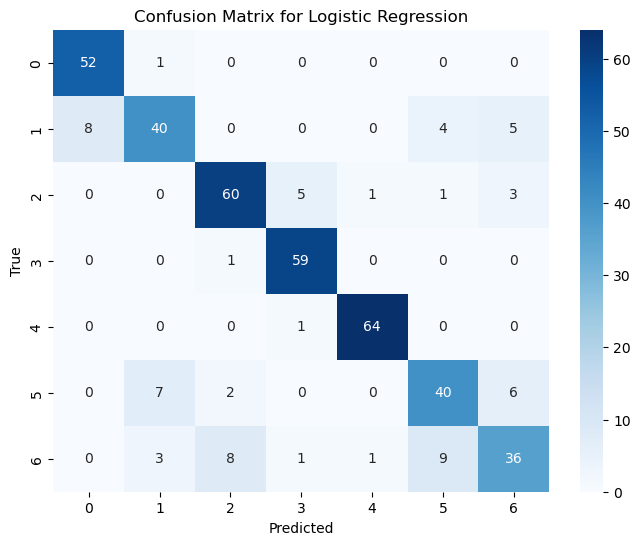

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        53
           1       0.78      0.70      0.74        57
           2       0.85      0.86      0.85        70
           3       0.89      0.98      0.94        60
           4       0.97      0.98      0.98        65
           5       0.74      0.73      0.73        55
           6       0.72      0.62      0.67        58

    accuracy                           0.84       418
   macro avg       0.83      0.84      0.83       418
weighted avg       0.83      0.84      0.84       418





In [116]:
lr_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'LogisticRegression', 'best_params'].values[0]
logistic_regression_model = LogisticRegression(random_state=0, **lr_best_params)
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)

print("Results for Logistic Regression:")
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix for Logistic Regression")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("\n")

evaluation_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
    'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_lr, average='weighted')
})

## Decision Tree

Results for Decision Tree:


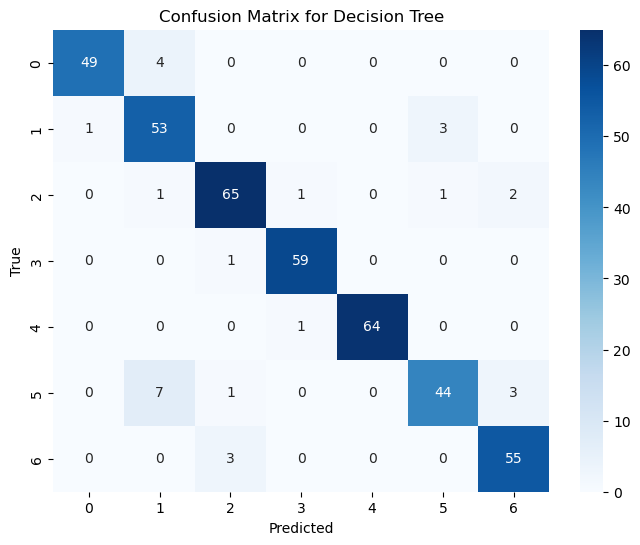

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.82      0.93      0.87        57
           2       0.93      0.93      0.93        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.92      0.80      0.85        55
           6       0.92      0.95      0.93        58

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418





In [117]:
dt_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'DecisionTree', 'best_params'].values[0]
decision_tree_model = DecisionTreeClassifier(random_state=0, **dt_best_params)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

print("Results for Decision Tree:")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix for Decision Tree")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\n")

evaluation_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_dt, average='weighted')
})

## Random Forest

Results for Random Forest:


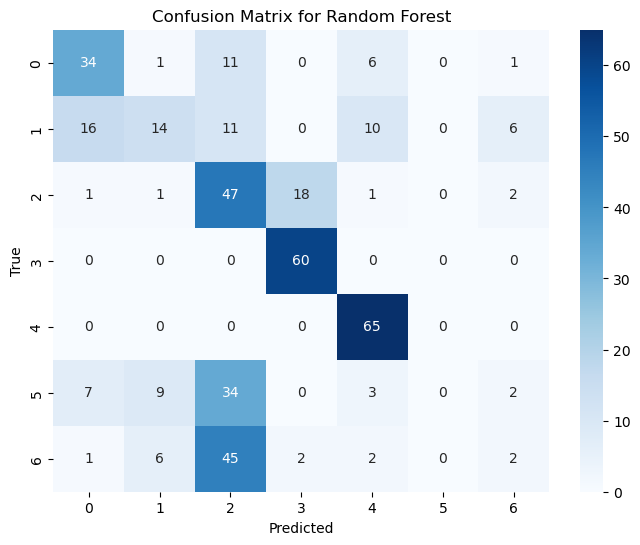

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        53
           1       0.45      0.25      0.32        57
           2       0.32      0.67      0.43        70
           3       0.75      1.00      0.86        60
           4       0.75      1.00      0.86        65
           5       0.00      0.00      0.00        55
           6       0.15      0.03      0.06        58

    accuracy                           0.53       418
   macro avg       0.43      0.51      0.45       418
weighted avg       0.43      0.53      0.46       418





In [118]:
rf_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'RandomForest', 'best_params'].values[0]
random_forest_model = RandomForestClassifier(random_state=0, **rf_best_params)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

print("Results for Random Forest:")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix for Random Forest")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("\n")

evaluation_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_rf, average='weighted')
})

## Gaussian Naive Bayes

Results for Gaussian Naive Bayes:


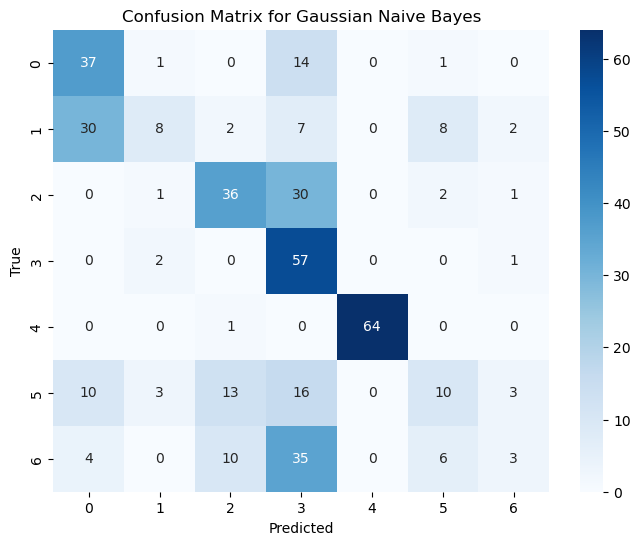

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.46      0.70      0.55        53
           1       0.53      0.14      0.22        57
           2       0.58      0.51      0.55        70
           3       0.36      0.95      0.52        60
           4       1.00      0.98      0.99        65
           5       0.37      0.18      0.24        55
           6       0.30      0.05      0.09        58

    accuracy                           0.51       418
   macro avg       0.51      0.50      0.45       418
weighted avg       0.53      0.51      0.47       418





In [119]:
gnb_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'NaiveBayes', 'best_params'].values[0]
gaussian_nb_model = GaussianNB(**gnb_best_params)
gaussian_nb_model.fit(X_train, y_train)
y_pred_gnb = gaussian_nb_model.predict(X_test)

print("Results for Gaussian Naive Bayes:")
plot_confusion_matrix(y_test, y_pred_gnb, "Confusion Matrix for Gaussian Naive Bayes")
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb))
print("\n")

evaluation_results.append({
    'Model': 'Gaussian Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred_gnb),
    'Precision': precision_score(y_test, y_pred_gnb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_gnb, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_gnb, average='weighted')
})

## Support Vector Machine

Results for Support Vector Machine:


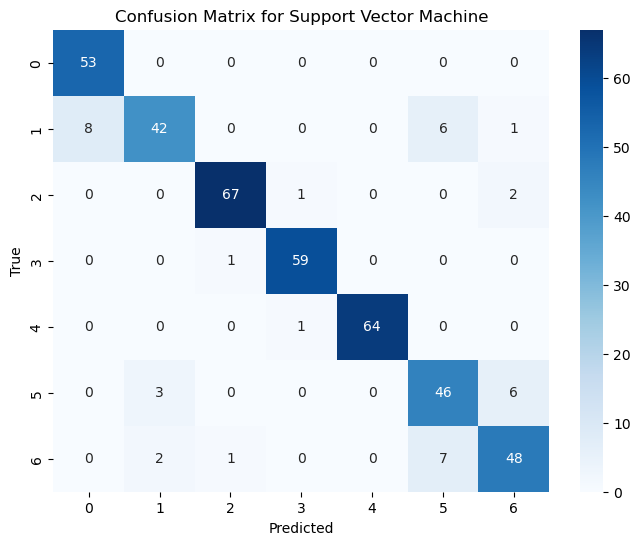

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        53
           1       0.89      0.74      0.81        57
           2       0.97      0.96      0.96        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.78      0.84      0.81        55
           6       0.84      0.83      0.83        58

    accuracy                           0.91       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.91      0.91      0.91       418





In [120]:
svc_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'SVC', 'best_params'].values[0]
svc_model = SVC(random_state=0, **svc_best_params)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Results for Support Vector Machine:")
plot_confusion_matrix(y_test, y_pred_svc, "Confusion Matrix for Support Vector Machine")
print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print("\n")

evaluation_results.append({
    'Model': 'Support Vector Machine',
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svc, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_svc, average='weighted')
})

## AdaBoost

Results for AdaBoost:


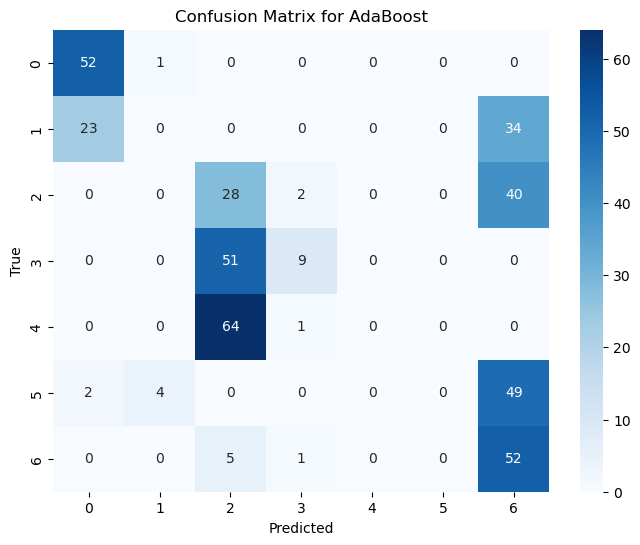

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80        53
           1       0.00      0.00      0.00        57
           2       0.19      0.40      0.26        70
           3       0.69      0.15      0.25        60
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        55
           6       0.30      0.90      0.45        58

    accuracy                           0.34       418
   macro avg       0.26      0.35      0.25       418
weighted avg       0.26      0.34      0.24       418





In [121]:
ada_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'AdaBoost', 'best_params'].values[0]
ada_boost_model = AdaBoostClassifier(random_state=0, **ada_best_params)
ada_boost_model.fit(X_train, y_train)
y_pred_ada = ada_boost_model.predict(X_test)

print("Results for AdaBoost:")
plot_confusion_matrix(y_test, y_pred_ada, "Confusion Matrix for AdaBoost")
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_ada))
print("\n")

evaluation_results.append({
    'Model': 'AdaBoost',
    'Accuracy': accuracy_score(y_test, y_pred_ada),
    'Precision': precision_score(y_test, y_pred_ada, average='weighted'),
    'Recall': recall_score(y_test, y_pred_ada, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_ada, average='weighted')
})

## XGBoost

[18:07:36] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost:


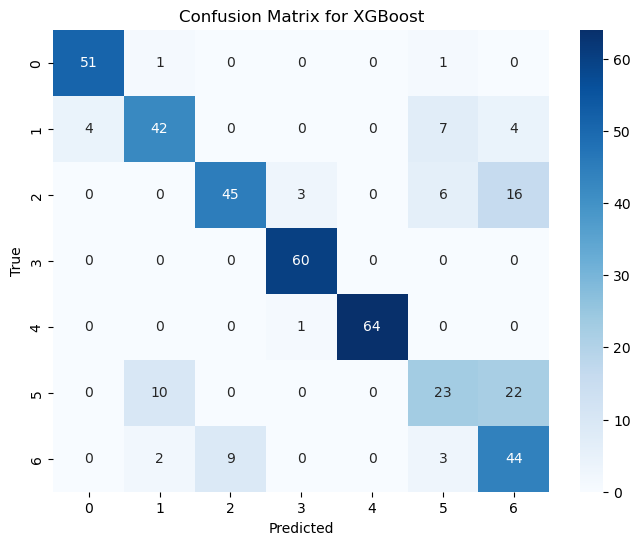

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.76      0.74      0.75        57
           2       0.83      0.64      0.73        70
           3       0.94      1.00      0.97        60
           4       1.00      0.98      0.99        65
           5       0.57      0.42      0.48        55
           6       0.51      0.76      0.61        58

    accuracy                           0.79       418
   macro avg       0.79      0.79      0.78       418
weighted avg       0.80      0.79      0.79       418





In [122]:
xgb_best_params = results_dataframe.loc[results_dataframe['model_name'] == 'XGBoost', 'best_params'].values[0]
xgb_model = XGBClassifier(random_state=0, **xgb_best_params)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("Results for XGBoost:")
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix for XGBoost")
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("\n")

evaluation_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_xgb, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_xgb, average='weighted')
})

## Model Comparison

In [123]:
comp = pd.DataFrame(evaluation_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(comp)

best_model_name = comp.loc[comp['Accuracy'].idxmax()]['Model']
print(f"\nBest model is {best_model_name}")

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.839713   0.834836  0.839713  0.835672
1           Decision Tree  0.930622   0.933093  0.930622  0.930666
2           Random Forest  0.531100   0.433015  0.531100  0.456428
3    Gaussian Naive Bayes  0.514354   0.525203  0.514354  0.465020
4  Support Vector Machine  0.906699   0.908403  0.906699  0.905773
5                AdaBoost  0.337321   0.257914  0.337321  0.241781
6                 XGBoost  0.787081   0.797980  0.787081  0.785284

Best model is Decision Tree


## Save Scaler, Encoder, and Model

In [125]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(ct, 'onehot_encoder.joblib')
joblib.dump(le, 'label_encoder.joblib')

if best_model_name == 'Logistic Regression':
    joblib.dump(logistic_regression_model, 'model.joblib')
elif best_model_name == 'Decision Tree':
    joblib.dump(decision_tree_model, 'model.joblib')
elif best_model_name == 'Random Forest':
    joblib.dump(random_forest_model, 'model.joblib')
elif best_model_name == 'Gaussian Naive Bayes':
    joblib.dump(gaussian_nb_model, 'model.joblib')
elif best_model_name == 'Support Vector Machine':
    joblib.dump(svc_model, 'model.joblib')
elif best_model_name == 'AdaBoost':
    joblib.dump(ada_boost_model, 'model.joblib')
else:
    joblib.dump(xgb_model, 'model.joblib')

## Feature Importance

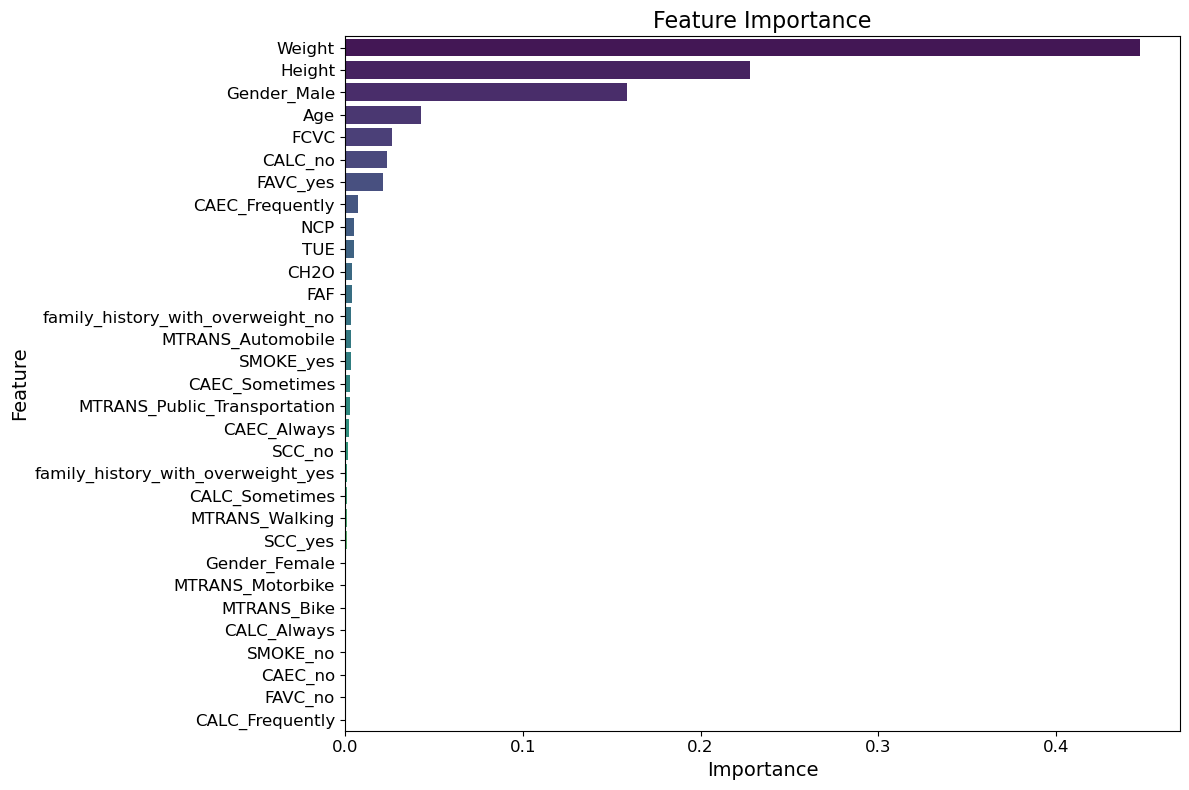

In [137]:
ct = joblib.load('onehot_encoder.joblib')
model = joblib.load('model.joblib')

def get_feature_names(column_transformer):
    feature_names = []
    for transformer in column_transformer.transformers_:
        if transformer[0] == 'remainder' and transformer[1] == 'passthrough':
            feature_names.extend(column_transformer.feature_names_in_[transformer[2]])
        elif hasattr(transformer[1], 'get_feature_names_out'):
            feature_names.extend(transformer[1].get_feature_names_out(transformer[2]))
        else:
            feature_names.extend(transformer[2])
    return feature_names

def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = model.coef_[0]
    else:
        print("Model does not have feature importance or coefficients")
        return
    
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

feature_names = get_feature_names(ct)
plot_feature_importance(model, feature_names)

# Predict New Data

In [15]:
def predict_new_data(new_data):
    scaler = joblib.load('scaler.joblib')
    ct = joblib.load('onehot_encoder.joblib')
    le = joblib.load('label_encoder.joblib')
    model = joblib.load('model.joblib')

    new_data_df = pd.DataFrame(new_data)

    new_data_df[numerical_columns] = scaler.transform(new_data_df[numerical_columns])
    new_data_transformed = ct.transform(new_data_df)

    predictions = model.predict(new_data_transformed)
    predictions = le.inverse_transform(predictions)
    return predictions


In [16]:
new_data = [
    {
        "Gender": "Female", "Age": 21.0, "Height": 1.62, "Weight": 64.0,
        "family_history_with_overweight": "yes", "FAVC": "no", "FCVC": 2.0,
        "NCP": 3.0, "CAEC": "Sometimes", "SMOKE": "no", "CH2O": 2.0,
        "SCC": "no", "FAF": 0.0, "TUE": 1.0, "CALC": "no",
        "MTRANS": "Public_Transportation"
    },
    {
        "Gender": "Male", "Age": 24, "Height": 1.70, "Weight": 81,
        "family_history_with_overweight": "yes", "FAVC": "yes", "FCVC": 2.0,
        "NCP": 3.0, "CAEC": "Sometimes", "SMOKE": "no", "CH2O": 2.76,
        "SCC": "no", "FAF": 0.0, "TUE": 1.0, "CALC": "Sometimes",
        "MTRANS": "Public_Transportation"
    }
]

predictions = predict_new_data(new_data)
print(predictions)

['Normal_Weight' 'Overweight_Level_II']
